In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use( 'dark_background')

## 📊 Uber Trip Information Overview

This notebook presents an Exploratory Data Analysis (EDA) of Uber trip data. The objective is to extract meaningful insights related to:

- Travel purposes
- Trip durations
- Start and end locations
- Patterns in mobility

The analysis will help us better understand how Uber was used across different trip types and timeframes.

### 🔍 Dataset Description

The dataset contains records of Uber trips with the following columns:

- **Date**: The date of the trip.
- **Time**: The time the trip started.
- **Category**: Type of travel — typically “Business” or “Personal”.
- **Start**: The starting location of the trip.
- **Stop**: The destination or ending location of the trip.
- **Miles**: Total distance covered during the trip in miles.
- **Purpose**: The reason for the trip (e.g., Meeting, Errand/Supplies, Meal/Entertain, etc.).

### 🎯 Analysis Focus

The analysis aims to:

- Identify the most common trip purposes
- Compare business vs personal trip patterns
- Analyze distances traveled for different purposes and categories
- Visualize trends in trip frequency over time
- Discover insights into frequently used routes and locations

The goal is to derive actionable insights from Uber trip history using data visualization and descriptive statistics.



In [ ]:
# Reading a DataFrame
df = pd.read_csv('/content/UberData.csv')

In [ ]:
# Checking First 5 Values
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
df.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [ ]:
#Renaming Columns
df.columns =['Start Date' , 'End Date' , 'Category','Start' , 'Destination' , 'Miles' , 'Purpose']

In [ ]:
df


,Start Date,End Date,Category,Start,Destination,Miles,Purpose
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [ ]:
# More Information About The DataSet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Start Date   1156 non-null   object 
 1   End Date     1155 non-null   object 
 2   Category     1155 non-null   object 
 3   Start        1155 non-null   object 
 4   Destination  1155 non-null   object 
 5   Miles        1156 non-null   float64
 6   Purpose      653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [ ]:
#Checking Existence of Null(NAN) Values
for col in df.columns:
    null_count = sum(df[col].isnull())
    print(f"Column '{col}' has {null_count} null values.")


Column 'Start Date' has 0 null values.
Column 'End Date' has 1 null values.
Column 'Category' has 1 null values.
Column 'Start' has 1 null values.
Column 'Destination' has 1 null values.
Column 'Miles' has 0 null values.
Column 'Purpose' has 503 null values.


In [ ]:
# Seperating Time from The Date
df['Start Time'] = df['Start Date'].str.split(' ').str[1]
df['End Time'] = df['End Date'].str.split(' ').str[1]
df


,Start Date,End Date,Category,Start,Destination,Miles,Purpose,Start Time,End Time
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21:11,21:17
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN,1:25,1:37
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20:25,20:38
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17:31,17:45
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14:42,15:49
...,...,...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site,13:24,13:42
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting,15:03,15:38
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site,21:32,21:50
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site,22:08,23:51


In [ ]:
# Removing Time From The Dates
df['Start Date'] = df['Start Date'].str.split(' ').str[0]
df['End Date'] = df['End Date'].str.split(' ').str[0]
df

,Start Date,End Date,Category,Start,Destination,Miles,Purpose,Start Time,End Time
0,1/1/2016,1/1/2016,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21:11,21:17
1,1/2/2016,1/2/2016,Business,Fort Pierce,Fort Pierce,5.0,NaN,1:25,1:37
2,1/2/2016,1/2/2016,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20:25,20:38
3,1/5/2016,1/5/2016,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17:31,17:45
4,1/6/2016,1/6/2016,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14:42,15:49
...,...,...,...,...,...,...,...,...,...
1151,12/31/2016,12/31/2016,Business,Kar?chi,Unknown Location,3.9,Temporary Site,13:24,13:42
1152,12/31/2016,12/31/2016,Business,Unknown Location,Unknown Location,16.2,Meeting,15:03,15:38
1153,12/31/2016,12/31/2016,Business,Katunayake,Gampaha,6.4,Temporary Site,21:32,21:50
1154,12/31/2016,12/31/2016,Business,Gampaha,Ilukwatta,48.2,Temporary Site,22:08,23:51


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Start Date   1156 non-null   object 
 1   End Date     1155 non-null   object 
 2   Category     1155 non-null   object 
 3   Start        1155 non-null   object 
 4   Destination  1155 non-null   object 
 5   Miles        1156 non-null   float64
 6   Purpose      653 non-null    object 
 7   Start Time   1155 non-null   object 
 8   End Time     1155 non-null   object 
dtypes: float64(1), object(8)
memory usage: 81.4+ KB


In [ ]:
# Dropping & Filling the Values which have NAN
df= df[(df['Start'] != 'Unknown Location') & (df['Destination'] != 'Unknown Location')]
df['Purpose'] = df['Purpose'].fillna('Not Specified')
df['Category'] = df['Category'].fillna('Not Specified')
df['Start Time'] = df['Start Time'].fillna('00:00')
df['End Time'] = df['End Time'].fillna('00:00')
df = df.reset_index( drop = True )


#Dropping Duplicate Values
df.drop_duplicates()
df


/tmp/ipython-input-12-2626107349.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Purpose'] = df['Purpose'].fillna('Not Specified')
/tmp/ipython-input-12-2626107349.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'] = df['Category'].fillna('Not Specified')
/tmp/ipython-input-12-2626107349.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

,Start Date,End Date,Category,Start,Destination,Miles,Purpose,Start Time,End Time
0,1/1/2016,1/1/2016,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21:11,21:17
1,1/2/2016,1/2/2016,Business,Fort Pierce,Fort Pierce,5.0,Not Specified,1:25,1:37
2,1/2/2016,1/2/2016,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20:25,20:38
3,1/5/2016,1/5/2016,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17:31,17:45
4,1/6/2016,1/6/2016,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14:42,15:49
...,...,...,...,...,...,...,...,...,...
940,12/30/2016,12/30/2016,Business,Kar?chi,Kar?chi,0.8,Customer Visit,23:06,23:10
941,12/31/2016,12/31/2016,Business,Kar?chi,Kar?chi,0.7,Meeting,1:07,1:14
942,12/31/2016,12/31/2016,Business,Katunayake,Gampaha,6.4,Temporary Site,21:32,21:50
943,12/31/2016,12/31/2016,Business,Gampaha,Ilukwatta,48.2,Temporary Site,22:08,23:51


In [ ]:
# Checking The Shape of The DataSet
df.shape

(945, 9)

In [ ]:
# Duration Of Journey
start_hour = df['Start Time'].str.split(':').str[0].astype(int)
end_hour = df['End Time'].str.split(':').str[0].astype(int)

start_min = df['Start Time'].str.split(':').str[1].astype(int)
end_min = df['End Time'].str.split(':').str[1].astype(int)

# Duration components with midnight wrapping
hour_diff = (end_hour - start_hour + 24) % 24
min_diff = (end_min - start_min + 60) % 60

# If minute "wrap" happened, subtract 1 hour from hour_diff
hour_adjust = ((end_min - start_min) < 0).astype(int)

# Total duration in hours
df['Duration'] = (hour_diff - hour_adjust)*60 + min_diff
df



,Start Date,End Date,Category,Start,Destination,Miles,Purpose,Start Time,End Time,Duration
0,1/1/2016,1/1/2016,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21:11,21:17,6
1,1/2/2016,1/2/2016,Business,Fort Pierce,Fort Pierce,5.0,Not Specified,1:25,1:37,12
2,1/2/2016,1/2/2016,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20:25,20:38,13
3,1/5/2016,1/5/2016,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17:31,17:45,14
4,1/6/2016,1/6/2016,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14:42,15:49,67
...,...,...,...,...,...,...,...,...,...,...
940,12/30/2016,12/30/2016,Business,Kar?chi,Kar?chi,0.8,Customer Visit,23:06,23:10,4
941,12/31/2016,12/31/2016,Business,Kar?chi,Kar?chi,0.7,Meeting,1:07,1:14,7
942,12/31/2016,12/31/2016,Business,Katunayake,Gampaha,6.4,Temporary Site,21:32,21:50,18
943,12/31/2016,12/31/2016,Business,Gampaha,Ilukwatta,48.2,Temporary Site,22:08,23:51,103


In [ ]:
# Getting Description of the Continous/Numerical data
df.describe()

,Miles,Duration
count,945.000000,945.000000
mean,22.809841,21.010582
std,397.276813,23.955597
min,0.500000,0.000000
25%,2.600000,10.000000
50%,5.300000,16.000000
75%,9.900000,24.000000
max,12204.700000,330.000000


In [ ]:
# Display Data
df


,Start Date,End Date,Category,Start,Destination,Miles,Purpose,Start Time,End Time,Duration
0,1/1/2016,1/1/2016,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21:11,21:17,6
1,1/2/2016,1/2/2016,Business,Fort Pierce,Fort Pierce,5.0,Not Specified,1:25,1:37,12
2,1/2/2016,1/2/2016,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20:25,20:38,13
3,1/5/2016,1/5/2016,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17:31,17:45,14
4,1/6/2016,1/6/2016,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14:42,15:49,67
...,...,...,...,...,...,...,...,...,...,...
940,12/30/2016,12/30/2016,Business,Kar?chi,Kar?chi,0.8,Customer Visit,23:06,23:10,4
941,12/31/2016,12/31/2016,Business,Kar?chi,Kar?chi,0.7,Meeting,1:07,1:14,7
942,12/31/2016,12/31/2016,Business,Katunayake,Gampaha,6.4,Temporary Site,21:32,21:50,18
943,12/31/2016,12/31/2016,Business,Gampaha,Ilukwatta,48.2,Temporary Site,22:08,23:51,103


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Start Date   945 non-null    object 
 1   End Date     944 non-null    object 
 2   Category     945 non-null    object 
 3   Start        944 non-null    object 
 4   Destination  944 non-null    object 
 5   Miles        945 non-null    float64
 6   Purpose      945 non-null    object 
 7   Start Time   945 non-null    object 
 8   End Time     945 non-null    object 
 9   Duration     945 non-null    int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 74.0+ KB


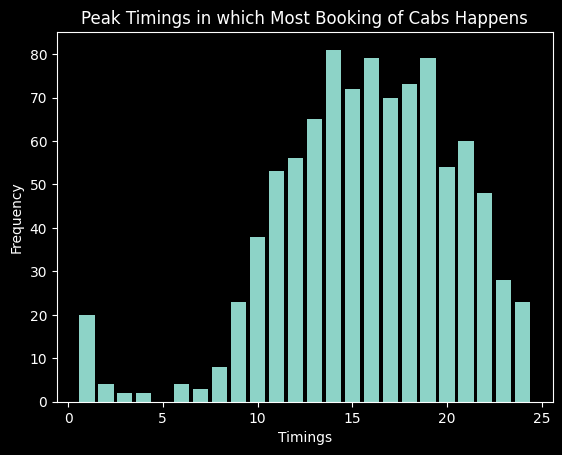

In [ ]:
# Peak Timings in which Most Booking of Cabs Happens
hours = df['Start Time'].str.split(':').str[0].astype(int)
x_values =np.linspace(0,24,1)
y_values = np.zeros(24)
for i in range(len(hours)):
  y_values[hours[i]] += 1


plt.bar(range(1,25), y_values)
plt.xlabel('Timings')
plt.ylabel('Frequency')
plt.title('Peak Timings in which Most Booking of Cabs Happens')
plt.show()

# Conclusion From The Above Bar Plot

- The Lesser Number of Cabs are Booked in the early Morning i.e. from (12 P.M. to 9 A.M.)

- There is a sudden increase in a booking of cabs from 10 A.M. to 8 P.M.

- The demand of cabs are then decreased in the subsequent hours


In [ ]:
# Getting the min and max time in Minutes
print(f"Max Time is : {df['Duration'].max()} Minutes")
print(f"Min Time is : {df['Duration'].min()} Minutes")


Max Time is : 330 Minutes
Min Time is : 0 Minutes


In [ ]:
#dropping all the values which have duration as 0 minutes
df = df[df['Duration'] != 0]
df

,Start Date,End Date,Category,Start,Destination,Miles,Purpose,Start Time,End Time,Duration
0,1/1/2016,1/1/2016,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21:11,21:17,6
1,1/2/2016,1/2/2016,Business,Fort Pierce,Fort Pierce,5.0,Not Specified,1:25,1:37,12
2,1/2/2016,1/2/2016,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20:25,20:38,13
3,1/5/2016,1/5/2016,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17:31,17:45,14
4,1/6/2016,1/6/2016,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14:42,15:49,67
...,...,...,...,...,...,...,...,...,...,...
939,12/30/2016,12/30/2016,Business,Kar?chi,Kar?chi,4.6,Meeting,16:45,17:08,23
940,12/30/2016,12/30/2016,Business,Kar?chi,Kar?chi,0.8,Customer Visit,23:06,23:10,4
941,12/31/2016,12/31/2016,Business,Kar?chi,Kar?chi,0.7,Meeting,1:07,1:14,7
942,12/31/2016,12/31/2016,Business,Katunayake,Gampaha,6.4,Temporary Site,21:32,21:50,18


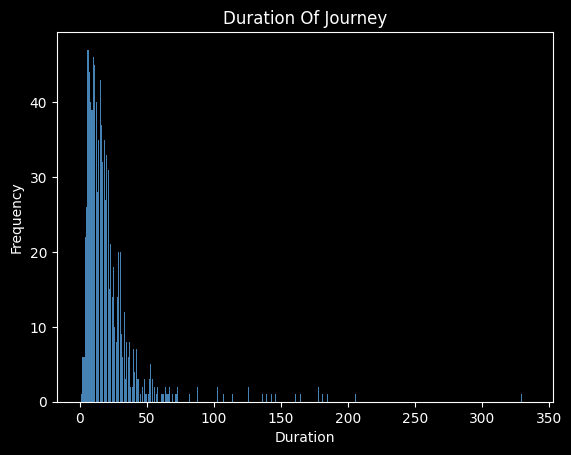

In [ ]:
y_values = np.zeros(337)
for x in df['Duration'] :
    y_values[int(x)]+=1 ;

plt.bar(range(337), y_values,color ='steelblue')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Duration Of Journey')
plt.show()


In [ ]:
#As there are Outliers value we can eliminate them
Q1 = df['Duration'].quantile(0.25)
Q3 = df['Duration'].quantile(0.75)
IQR = Q3 - Q1
sample_df = df[(df['Duration'] >= Q1 - 1.5 * IQR) & (df['Duration'] <= Q3 + 1.5 * IQR)]
sample_df

,Start Date,End Date,Category,Start,Destination,Miles,Purpose,Start Time,End Time,Duration
0,1/1/2016,1/1/2016,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21:11,21:17,6
1,1/2/2016,1/2/2016,Business,Fort Pierce,Fort Pierce,5.0,Not Specified,1:25,1:37,12
2,1/2/2016,1/2/2016,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20:25,20:38,13
3,1/5/2016,1/5/2016,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17:31,17:45,14
5,1/6/2016,1/6/2016,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17:15,17:19,4
...,...,...,...,...,...,...,...,...,...,...
938,12/30/2016,12/30/2016,Business,Kar?chi,Kar?chi,4.6,Errand/Supplies,15:41,16:03,22
939,12/30/2016,12/30/2016,Business,Kar?chi,Kar?chi,4.6,Meeting,16:45,17:08,23
940,12/30/2016,12/30/2016,Business,Kar?chi,Kar?chi,0.8,Customer Visit,23:06,23:10,4
941,12/31/2016,12/31/2016,Business,Kar?chi,Kar?chi,0.7,Meeting,1:07,1:14,7


In [ ]:
print(sample_df['Duration'].max())
print(sample_df['Duration'].min())

45
1


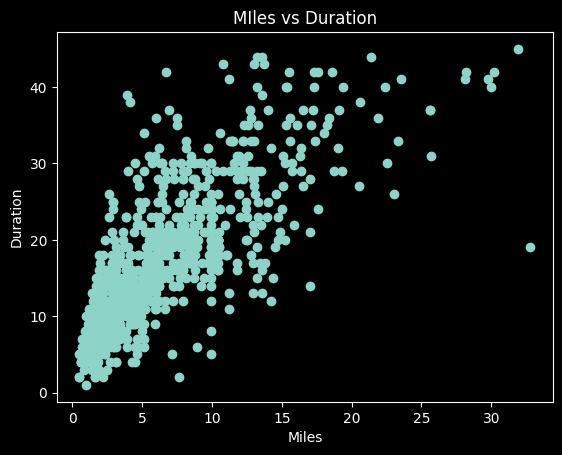

In [ ]:
# Relationship Between Duration and Miles
plt.scatter(sample_df['Miles'] , sample_df['Duration'])
plt.title("MIles vs Duration")
plt.xlabel("Miles")
plt.ylabel("Duration")
plt.show()

# Conclusion from The Above Scatter Plot

- There is a linear relationship between the trip duration and Miles covered within the same trip .

- As the Number of Miles Increases The Trip Time also Increases .

In [ ]:
# City where Most Cabs are Booked
df['Start'].value_counts()

,count
Start,
Cary,200
Morrisville,85
Whitebridge,68
Durham,37
Raleigh,28
...,...
Krendle Woods,1
Fuquay-Varina,1
Wake Co.,1


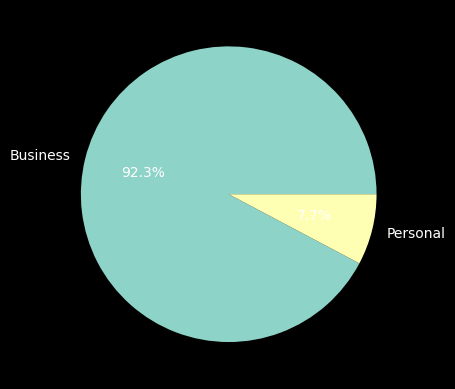

In [ ]:
# Plotting a Pie chart For Journey Category
category_df = df['Category'].value_counts()
plt.pie(category_df, labels=category_df.index, autopct='%1.1f%%')
plt.show()

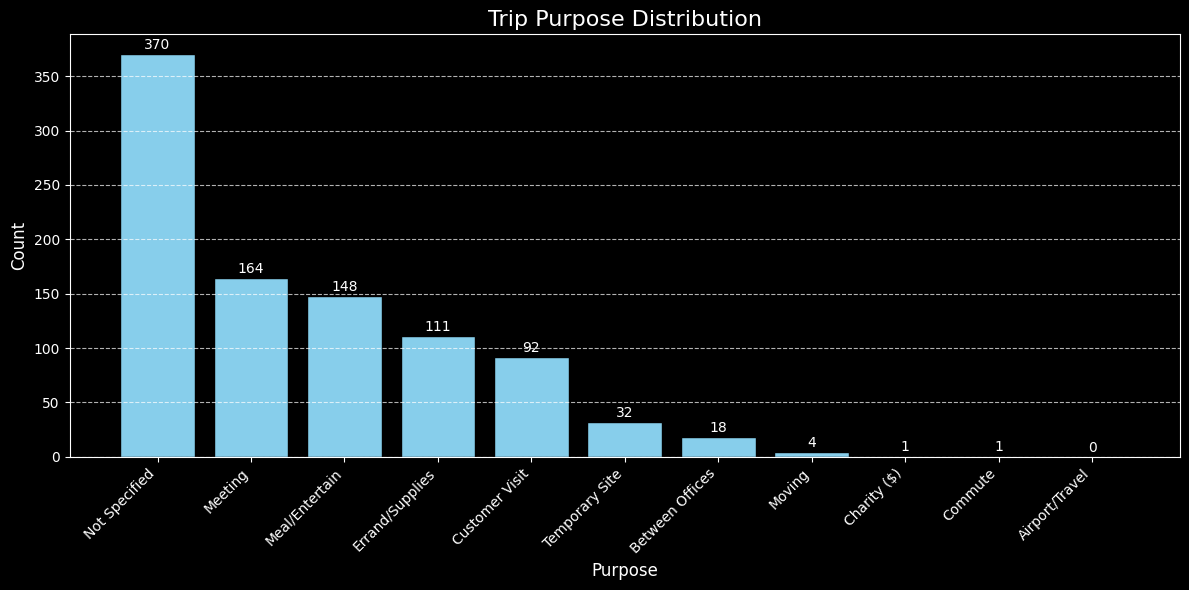

In [ ]:
import matplotlib.pyplot as plt

# Data
purposes = [
    "Not Specified", "Meeting", "Meal/Entertain", "Errand/Supplies",
    "Customer Visit", "Temporary Site", "Between Offices",
    "Moving", "Charity ($)", "Commute", "Airport/Travel"
]
counts = [370, 164, 148, 111, 92, 32, 18, 4, 1, 1, 0]  # Adding 0 for missing value of 'Airport/Travel'

# Plotting
plt.figure(figsize=(12, 6))  # Wide figure for clarity
bars = plt.bar(purposes, counts, color='skyblue', edgecolor='black')

# Styling
plt.title("Trip Purpose Distribution", fontsize=16)
plt.xlabel("Purpose", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, str(height),
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()



In [ ]:
Morrisville = df[df['Start'] == 'Morrisville']
Morrisville

,Start Date,End Date,Category,Start,Destination,Miles,Purpose,Start Time,End Time,Duration
27,1/15/2016,1/15/2016,Business,Morrisville,Cary,8.0,Errand/Supplies,0:41,1:01,20
68,2/4/2016,2/4/2016,Business,Morrisville,Cary,9.7,Meal/Entertain,9:37,10:09,32
82,2/7/2016,2/7/2016,Business,Morrisville,Cary,6.1,Meeting,20:22,20:40,18
90,2/9/2016,2/9/2016,Business,Morrisville,Cary,6.1,Meal/Entertain,20:24,20:40,16
94,2/11/2016,2/11/2016,Business,Morrisville,Cary,6.1,Temporary Site,20:36,20:51,15
...,...,...,...,...,...,...,...,...,...,...
866,12/4/2016,12/4/2016,Business,Morrisville,Cary,3.4,Customer Visit,20:23,20:34,11
884,12/10/2016,12/10/2016,Business,Morrisville,Cary,3.1,Customer Visit,22:09,22:21,12
886,12/11/2016,12/11/2016,Business,Morrisville,Cary,4.8,Errand/Supplies,19:05,19:15,10
892,12/12/2016,12/12/2016,Business,Morrisville,Cary,3.0,Customer Visit,20:48,20:57,9


In [ ]:
# Most Cabs from Morrisville to Final Destination
Morrisville['Destination'].value_counts()

,count
Destination,
Cary,75
Morrisville,5
Raleigh,4
Banner Elk,1


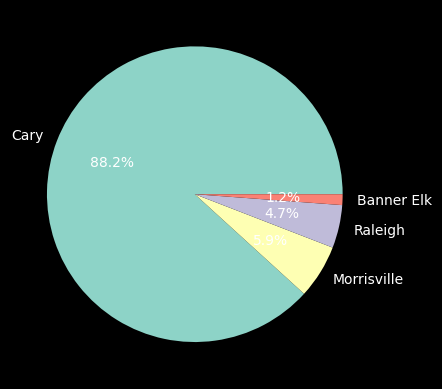

In [ ]:
# Pie Chart Of Final destination from MorrisVille
plt.pie(Morrisville['Destination'].value_counts(), labels=Morrisville['Destination'].value_counts().index, autopct='%1.1f%%')
plt.show()

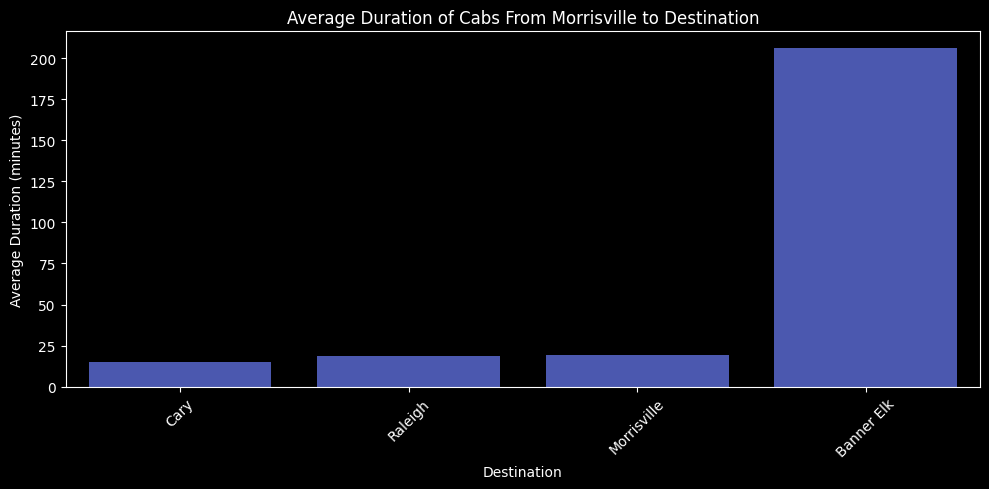

In [ ]:
morrisville = df[df['Start'] == 'Morrisville']
avg_duration = morrisville.groupby('Destination')['Duration'].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_duration.index, y=avg_duration.values, palette="coolwarm", legend = False , hue = x)
plt.xticks(rotation=45)
plt.xlabel('Destination')
plt.ylabel('Average Duration (minutes)')
plt.title('Average Duration of Cabs From Morrisville to Destination')
plt.tight_layout()
plt.show()
